In [2]:
# Dummy data set

import pandas as pd
import numpy as np

df = pd.DataFrame({'age' : [2,4,6], 'height' : [20,40,60], 'wts' : [32,34,38], 'gender' : ['M','F','M']})
df

,age,height,wts,gender
0,2,20,32,M
1,4,40,34,F
2,6,60,38,M


In [3]:
X = df[['age','height','wts']]

## Calculating the eign value and eign vector

evalue, evector = np.linalg.eig(X)

print(evalue)
evector

[ 8.72863617e+01 -1.74814387e-15 -7.28636167e+00]


array([[-4.03094953e-01, -9.95037190e-01, -8.99274765e-01],
       [-5.56486180e-01,  9.95037190e-02, -2.02633096e-01],
       [-7.26524322e-01,  2.31320866e-16,  3.87614145e-01]])

In [4]:
pcs = np.dot(X, evector)

pcs

array([[-3.51846918e+01,  6.29204470e-15,  6.55244118e+00],
       [-4.85736540e+01,  5.64446341e-15,  1.47645802e+00],
       [-6.34156648e+01,  5.23747924e-15, -2.82429685e+00]])

In [5]:
## Converting the pcs into dataframe

pcs_df = pd.DataFrame(pcs)

pcs_df

,0,1,2
0,-35.184692,6.292045e-15,6.552441
1,-48.573654,5.644463e-15,1.476458
2,-63.415665,5.237479e-15,-2.824297


In [6]:
## Calculate the information given by each PC

Total_var = pcs_df.var()
Total_var

0    1.994229e+02
1    2.828510e-31
2    2.203089e+01
dtype: float64

In [7]:
## Sum of each PCs

total = Total_var.sum()
print(total)

221.45378971764345


In [9]:
## Converting Total_var into dataframe

var_of_each_pc = pd.DataFrame(Total_var)
var_of_each_pc

,0
0,1.994229e+02
1,2.828510e-31
2,2.203089e+01


In [10]:
## Percentage information of each PCs

var_of_each_pc['percentage'] = (round((var_of_each_pc[0]/total), 2) * 100)
var_of_each_pc

,0,percentage
0,1.994229e+02,90.0
1,2.828510e-31,0.0
2,2.203089e+01,10.0


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)

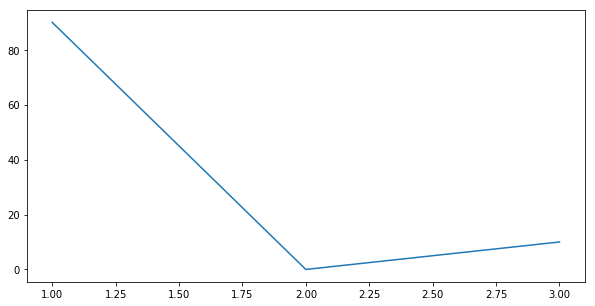

In [13]:
## Plot

X_axis = [1,2,3]
Y_axis = var_of_each_pc['percentage']

plt.plot(X_axis, Y_axis)

In [17]:
from pydataset import data

In [18]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [20]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Use of random forest algorithm

In [21]:
list(iris)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [22]:
x = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = iris[['Species']]

In [23]:
## Step-1 : Splitting the data into training and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) # or train_size = 0.8
len(x_train), len(x_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [24]:
max(iris['Petal.Width'])

2.5

In [25]:
max(iris['Sepal.Length'])

7.9

In [26]:
## Standarized the data

from sklearn.preprocessing import StandardScaler

## Create a standarized object

sc1 = StandardScaler()

## Fit this object on my test and training data

x_train1 = sc1.fit_transform(x_train)
x_test1 = sc1.transform(x_test)

In [27]:
## Creating the model

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

## Fitting the object on training data

model = classifier.fit(x_train1, y_train)
model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
## Prediting on test data

y_test['Pred_species'] = model.predict(x_test1)
y_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Species,Pred_species
69,versicolor,versicolor
33,setosa,setosa
122,virginica,virginica
149,virginica,virginica
23,setosa,setosa
126,virginica,virginica
24,setosa,setosa
13,setosa,setosa
79,versicolor,versicolor
148,virginica,virginica


In [29]:
pd.crosstab(index=y_test['Species'],columns=y_test['Pred_species'])

Pred_species,setosa,versicolor,virginica
Species,,,
setosa,13,0,0
versicolor,0,6,0
virginica,0,1,10


In [30]:
## Accura

29/30

0.9666666666666667

# k-fold cross validation----- % to machine model